- Basic setup to simulate trajectories with 3 parameters (drift, bound, starting point) using Euler Mayurama  method
	- Obtain histograms and psychometrics
	- Compare to analytic solutions, explore the error of the approximation with dt
	- Explore dependence of histograms and psychometrics with parameter values
- Add time varying bound, variability in parameters
- Explore race models

- "Optogenetic manipulations"
	- "Sensory neurons" vs "Integrator neurons"
	- Bound "deletion"
        - Other ways?

- History effects
	- Explore updates on starting point and drifts
	- Also post error slowing (increase bounds after errors)

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

### Basic setup

In [21]:
import numpy as np

# Define DDM parameters
mu = 0.5 # drift
theta = 1 # bound
z = 0 # starting point
sigma = 1 # noise std

# Define simulation parameters
n_trials = 50000
dt = .001
T = 10

# time array and prealocate results
t = np.arange(0, T, dt)
n_t = t.size
S = -np.ones((n_trials,2))
traj = np.zeros((n_trials, n_t))

# Simulate trajectories

for j in range(n_trials):
    
    dW   = np.random.randn(n_t,1)
    dx   = mu*dt + dW*np.sqrt(dt)
    x    = np.cumsum(dx,0)
    
    traj[j,:] = np.squeeze(x)
    
    for i in range(n_t):
        if x[i] >= theta:
            k = 1
            S[j,:] = [1, t[i]]                                         
            break
            
        elif x[i] <= -theta*2:
            k = -1
            S[j,:] = [0, t[i]]
            break
    
    traj[j, i:n_t] = np.nan

In [53]:
print(traj.shape)

(50000, 10000)


In [54]:
bins = np.linspace(0, 6, 30)

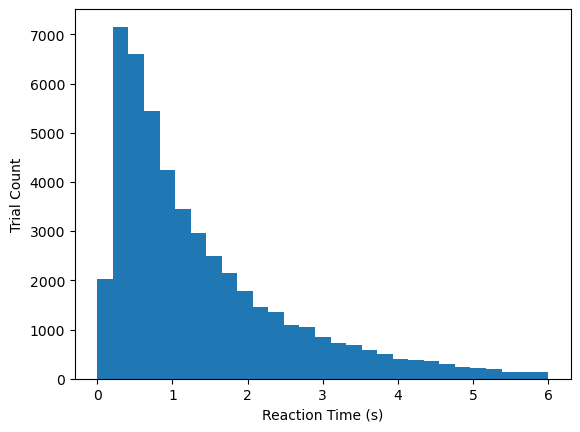

In [55]:
plt.hist(S[:,1],bins);
plt.xlabel('Reaction Time (s)');
plt.ylabel('Trial Count');


In [74]:
correct = np.where(S[:,0]==1)[0]
incorrect = np.where(S[:,0]==0)[0]

traj[trialExample[1],:]

array([-0.00024444, -0.04515545,  0.00426915, ...,         nan,
               nan,         nan])

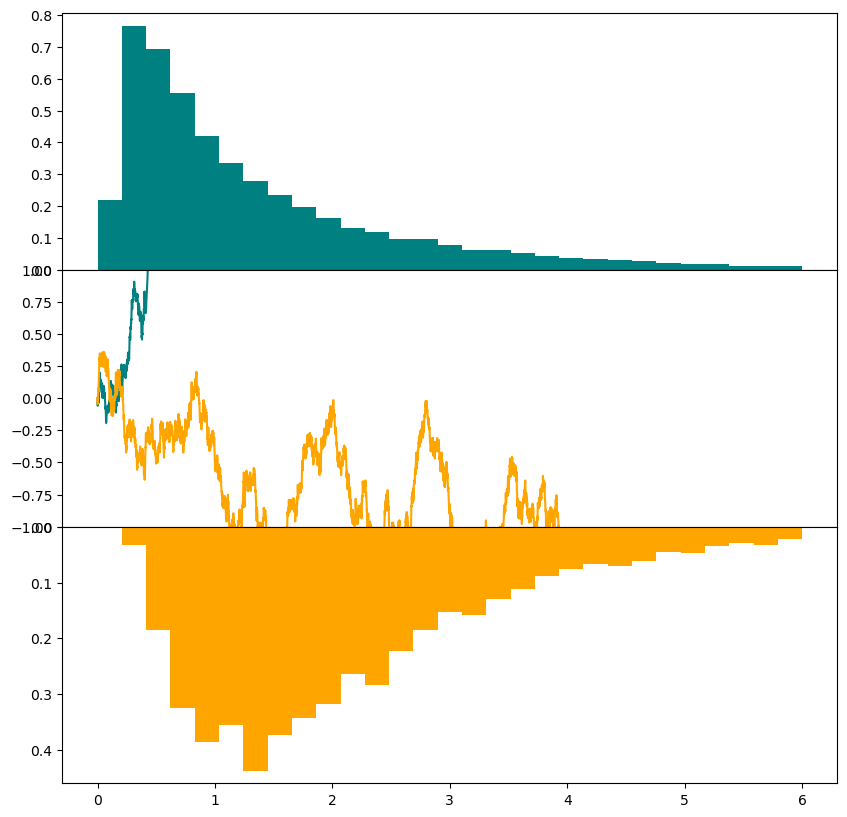

In [72]:
trialExample = [correct[4], incorrect[5]]
ranget = [np.sum(~np.isnan(traj[trialExample[0],:])), np.sum(~np.isnan(traj[trialExample[1],:]))]

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,10))

#axes[0].subplots_adjust(hspace=0)
axes[0].hist(S[correct,1], bins,density=True, color='teal');

axes[1].plot(t[0:ranget[0]], traj[trialExample[0],0:ranget[0]].T,color='teal');
axes[1].plot(t[0:ranget[1]], traj[trialExample[1],0:ranget[1]].T,color='orange');
axes[1].set_ylim([-1, 1])
axes[2].hist(S[incorrect,1], bins, density=True,color='orange');
axes[2].invert_yaxis()
plt.subplots_adjust(hspace=0)

#plt.xlabel('Reaction Time (s)');
#plt.ylabel('Trial Count');

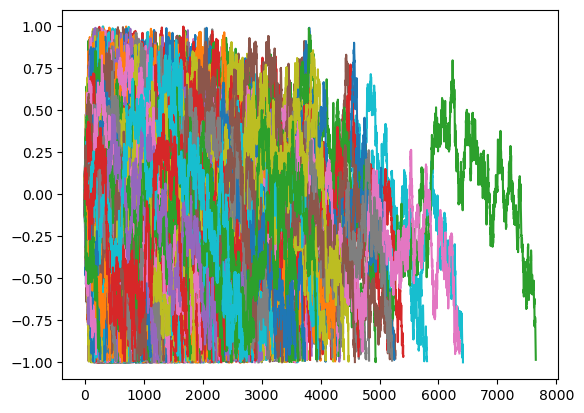

In [75]:
plt.plot(traj[incorrect,:].T);

In [59]:
ds_traj = traj[:, np.arange(0,n_t,50)]

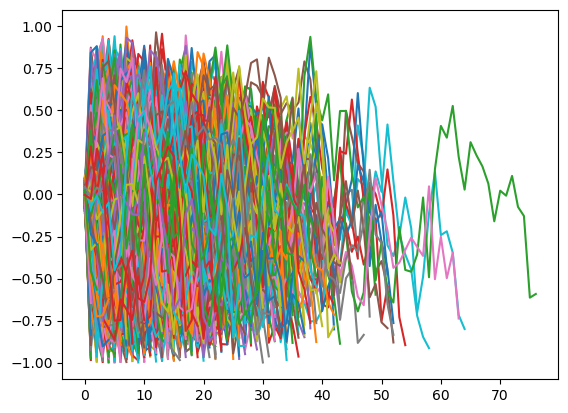

In [77]:
plt.plot(ds_traj[incorrect,:].T);

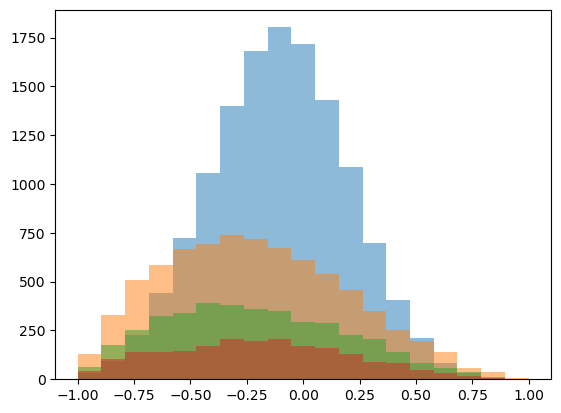

In [96]:
histbins = np.linspace(-1,1,20)
plt.hist(ds_traj[incorrect,1].T, histbins, alpha = 0.5);
plt.hist(ds_traj[incorrect,6].T, histbins, alpha = 0.5);
plt.hist(ds_traj[incorrect,11].T, histbins, alpha = 0.5);
plt.hist(ds_traj[incorrect,16].T, histbins, alpha = 0.5);